<a href="https://colab.research.google.com/github/ehsankarami1358/ehsan/blob/main/DecisionTree03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import pandas as pd


In [43]:
data=pd.read_csv('train.csv')

In [44]:
data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [45]:
data.isna().sum()

,0
id,0
title,558
author,1957
text,39
label,0


In [46]:
data=data.dropna(subset=['text'],axis=0)

In [47]:
data.isna().sum()

,0
id,0
title,558
author,1918
text,0
label,0


In [48]:
data.label.value_counts()

,count
label,
0,10387
1,10374


In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
#sns.barplot(data.label)

In [50]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
import re
import cProfile
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [51]:
cachedStopWords = stopwords.words("english")
def clean_text(text):
  text=re.sub('[^a-zA-Z]',' ',text)
  text=text.lower()
  #remove stopwords before tokenization
  text=[word for word in text.split() if word not in cachedStopWords]
  ps=PorterStemmer()
  text=[ps.stem(word) for word in text]
  text=' '.join(text)
  return text


In [52]:
#apply the cleaning function to text data column
data['processed_text']=data['text'].apply(clean_text)

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer

#TF-IDF stand for term Frequency-Inverse Document Frequency
#Extract features with 5000 features
tfidf=TfidfVectorizer(max_features=5000)

In [54]:
X=data.processed_text
y=data.label

In [55]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [56]:
X_train=tfidf.fit_transform(X_train)
X_test=tfidf.transform(X_test)

In [57]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier=DecisionTreeClassifier()
dt_classifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [58]:
from xgboost import XGBClassifier
#xgb_classifier=XGBClassifier()
#xgb_classifier.fit(X_train,y_train)

In [59]:
from sklearn.ensemble import ExtraTreesClassifier
et_classifier=ExtraTreesClassifier()
et_classifier.fit(X_train,y_train)

ExtraTreesClassifier()

In [60]:
from lightgbm import LGBMClassifier
lgbm_classifier=LGBMClassifier()
lgbm_classifier.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 8300, number of negative: 8308
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 3.934556 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 666356
[LightGBM] [Info] Number of data points in the train set: 16608, number of used features: 4993
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499759 -> initscore=-0.000963
[LightGBM] [Info] Start training from score -0.000963


LGBMClassifier()

In [61]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier=RandomForestClassifier()
rf_classifier.fit(X_train,y_train)

RandomForestClassifier()

In [62]:
from sklearn.metrics import accuracy_score
def acc_model(model,X_test,y_test):
  y_pred=model.predict(X_test)
  acc=accuracy_score(y_test,y_pred)
  return acc


In [63]:
pretrained_model={'Decision Tree':dt_classifier,'Extra Trees':et_classifier,
                  'LightGBM':lgbm_classifier,'Random Forest':rf_classifier}

In [64]:
acc_scores={name:acc_model(model,X_test,y_test) for name,model in pretrained_model.items()}

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [65]:
for model,acc in acc_scores.items():
  print(f'{model}: {acc*100:.2f}%')

Decision Tree: 87.14%
Extra Trees: 92.70%
LightGBM: 95.88%
Random Forest: 93.72%


In [66]:
from sklearn.metrics import roc_auc_score,roc_curve
def evaluate_pretrained_model(model,X_test,y_test):
  predictions=model.predict_proba(X_test)[:,1]
  roc_auc=roc_auc_score(y_test,predictions)
  return roc_auc

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Text(0, 0.5, 'ROC AUC Score')

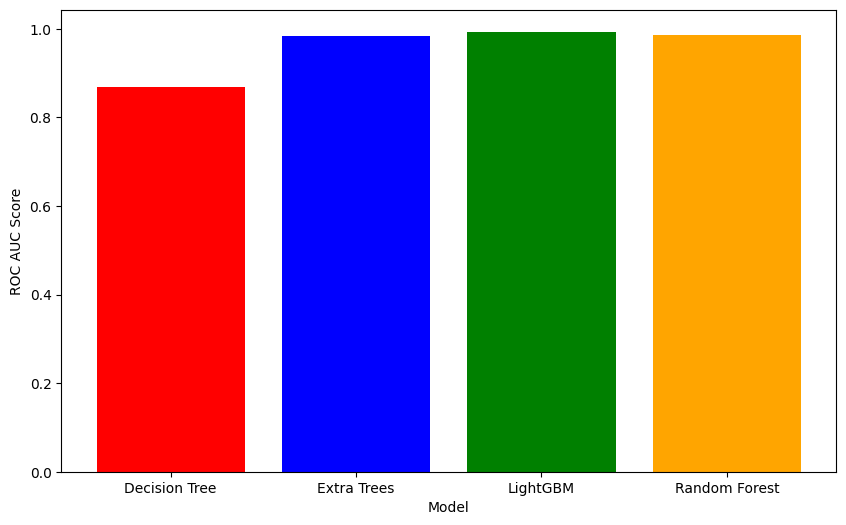

In [67]:
roc_auc_scores={name:evaluate_pretrained_model(model,X_test,y_test) for name,model in pretrained_model.items()}

# Evaluate each pre-trained model and store results
colors=['red','blue','green','orange']
plt.figure(figsize=(10,6))
bars=plt.bar(roc_auc_scores.keys(),roc_auc_scores.values(),color=colors)
plt.xlabel('Model')
plt.ylabel('ROC AUC Score')